#### Objective

To reproduce Figure 1 from the paper [Perception of visual information: The role of colour in seismic interpretation](http://earthdoc.eage.org/publication/publicationdetails/?publication=67462), by Froner, B., Purves, Steve, Lowell, J., and Henderson, J. (2013), First Break. 31, DOI 10.3997/1365-2397.2013010

#### Preliminaries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import skimage.color as skl
from skimage import io

#### Load and plot the figure to reproduce (used with permission from EAGE)

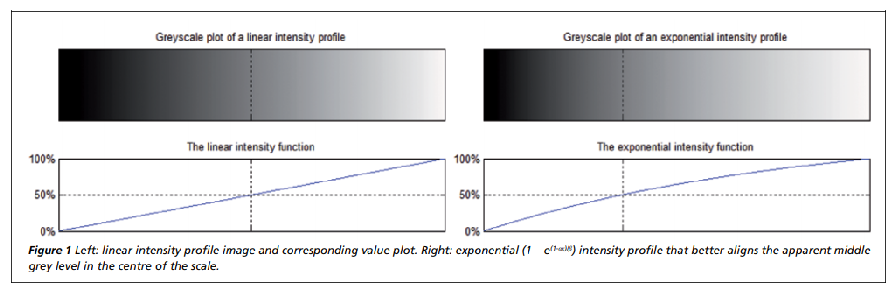

In [2]:
froner_et_al=io.imread('Froner_et_al_Figure_1.png')
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(froner_et_al);

#### Helper functions

In [3]:
def expo(x,a):
    """
    Makes an exponential curve.  
    
    Parameter:
        x (array): the x coordinate
        a (int): compressiveness
        
    Returns:
        y (array): the 1D exponential curve
    """
    y = np.array(1-(np.exp(1-(a*x))/2.5))
    return 100.0*(y-min(y))/(max(y)-min(y)) 

def rgb_expo(y):
    """ 
    Makes an RGB array of size 256x256, which can then be plotted as rectuangular colorbar image
    (with a specific plt.imshow aspect ratio)
    
    Parameters:
        y (array): exponential 1D curve. Can be output of expo function. 
        It is used as Lightness (L) dimension of initial Lab array
    
    Returns:
        rgb_exponential (array): the 256x256 RGB array
    """
    lexp = np.tile(y, (256,1))
    aexp = np.zeros((256,256))
    bexp = np.zeros((256,256))
    lab_exp = np.array(list(zip(lexp, aexp, bexp)))
    lab_exponential = np.swapaxes(lab_exp,1,2)
    rgb_exponential = skl.lab2rgb(lab_exponential)
    return rgb_exponential

def rgb_cmap(rgb_exponential):
    """ 
    Makes a Matplotlib LinearSegmentedColormap RGB exponential grayscale
    
    Parameters:
        rgb_exponential (array): exponential RGB array. Can be output of rgb_expo function   
    
    Returns:
        my_exp_cmap: LinearSegmentedColormap
    """
    r_exp = rgb_exponential[0,:,0]
    g_exp = rgb_exponential[0,:,1]
    b_exp = rgb_exponential[0,:,2]

    # sample 256 not perfectly 1. Normalizing y to [0-1]
    normr_exp=(r_exp-min(r_exp))/(max(r_exp)-min(r_exp))
    normg_exp=(g_exp-min(g_exp))/(max(g_exp)-min(g_exp))
    normb_exp=(b_exp-min(b_exp))/(max(b_exp)-min(b_exp))
    
    b3=normb_exp # value of blue at sample n
    b2=normb_exp # value of blue at sample n
    b1=np.linspace(0,1,len(b2)) # position of sample n - ranges from 0 to 1
    g3=normg_exp 
    g2=normg_exp
    g1=np.linspace(0,1,len(g2))
    r3=normr_exp 
    r2=normr_exp
    r1=np.linspace(0,1,len(r2))
    r=zip(r1,r2,r3) # red list
    g=zip(g1,g2,g3) # green list
    b=zip(b1,b2,b3) # blue list
    rgb_=zip(r,g,b) # creating final list
    rgb=zip(*rgb_)  # transposing list
    k=['red', 'green', 'blue'] # keys
    exponential_gray=dict(zip(k,rgb))  # makes a dictionary for LinearSegmentedColormap
    my_exp_cmap = clr.LinearSegmentedColormap('my_colormap', exponential_gray)
    return my_exp_cmap

#### Create the 1D exponential curve, the exponential RGB array, and the LinearSegmentedColormap

In [4]:
x = np.linspace(0,255,256)
y1 = expo(x,0.005)

In [5]:
rgb_exponential = rgb_expo(y1)

In [6]:
my_exp_cmap = rgb_cmap(rgb_exponential)

#### Plot a dashed vertical line at the abscissa x value where the exponential Lightness is 50 (marked as 50% in the original figure)

To do that requires finding the index of the element in an array that is closest (first greate than) a specific value:

In [7]:
idx = np.searchsorted(y1, 50, side="right").astype(int) # first index where value > 50

#### Create all the ticks then test plotting of both exponential 1D curve and rectangular colorbar with the vertical line

(and a horizontal line at L= 50)

In [8]:
y_ticks=[0, 20, 40, 50, 60, 80, 100]
x_ticks = [0, 50, 100, 150, 200, 250]
x_ticks.append(idx)
x_ticks=sorted(x_ticks)

In [9]:
x = np.arange(256)

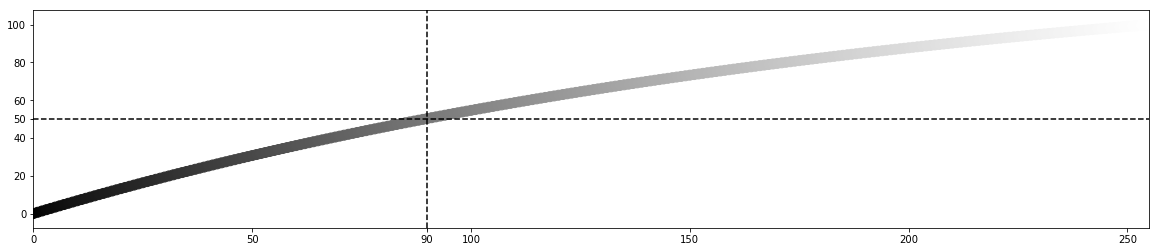

In [10]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks), y_ticks)
plt.xticks(np.array(x_ticks), x_ticks)
plt.scatter(x, y1, s = 100, c = my_exp_cmap(x))
plt.xlim(min(x),max(x))
ax.set_yticks([50], minor=True)
ax.axhline(50, linestyle='--', color='k') 
ax.set_xticks([idx], minor=True)
ax.axvline(idx, linestyle='--', color='k');

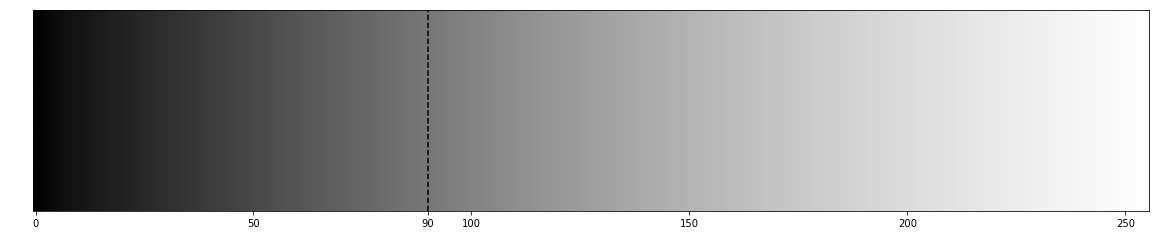

In [11]:
fig, ax = plt.subplots(figsize=(20,4))
plt.imshow(rgb_exponential, aspect=0.18)
ax.axvline(idx, linestyle='--', color='k');
ax.set_xticks(x_ticks);
ax.tick_params(axis='y', color='w', labelcolor='white');

Those look just right. Great!

#### Do the same for Matplotlib's standard grayscale

In [12]:
bw1=cm.gray(np.arange(256))
bw=bw1[:,:-1] # slicing to remove alpha

In [13]:
rbw = np.tile(bw[:,0], (256,1))
gbw = np.tile(bw[:,1], (256,1))
bbw = np.tile(bw[:,2], (256,1))
rgb_bw=np.swapaxes(np.array(list(zip(rbw, gbw, bbw))),1,2)
lab_bw = skl.rgb2lab(rgb_bw)
l_bw = lab_bw[0,:,0]

In [14]:
# finding index
idx1 = np.searchsorted(l_bw, 50, side="right") # first index where value > 0.5

In [15]:
y_ticks1=[0, 20, 40, 50, 60, 80, 100]
x_ticks1 = [0, 50, 100, 150, 200, 250]
x_ticks1.append(idx1)
x_ticks1=sorted(x_ticks1)

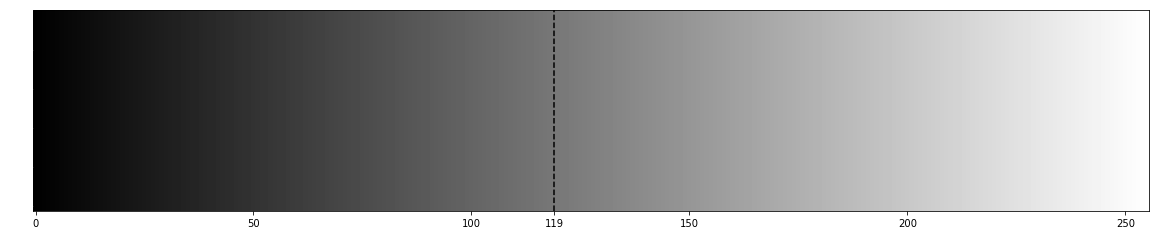

In [16]:
fig, ax = plt.subplots(figsize=(20,4))
plt.imshow(rgb_bw, aspect=0.18)
ax.axvline(idx1, linestyle='--', color='k');
ax.set_xticks(x_ticks1);
ax.tick_params(axis='y', color='w', labelcolor='white');

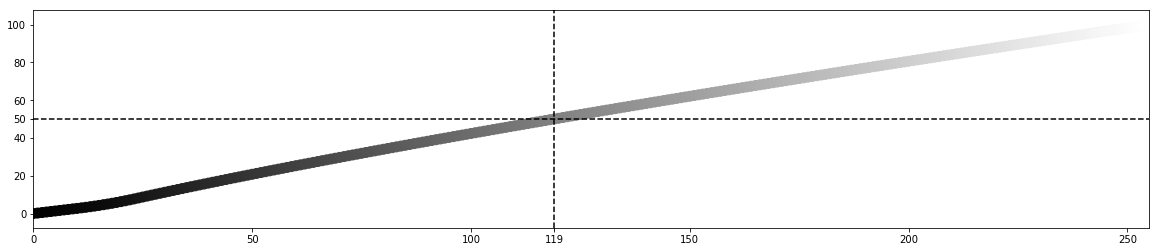

In [17]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks1), y_ticks1)
plt.xticks(np.array(x_ticks1), x_ticks1)
plt.scatter(x, l_bw, s = 100, c = l_bw, cmap='gray')
plt.xlim(min(x),max(x))
ax.set_yticks([50], minor=True)
ax.axhline(50, linestyle='--', color='k') 
ax.set_xticks([idx1], minor=True)
ax.axvline(idx1, linestyle='--', color='k');

Those also look right. 

Sort of... 

... this is a bit of an aside, but there's a kink in the Lightess curve above, where the slope decreases at a value of about 5. This is either by design, or due to something else.
If it is by design, it is in my opinion conter-intuitive: my understanding from color theory and human vision is that the human eye has LESS discrimination on the low Lightness end, so if anything the kink should have higher slope, if you really want to muck about with it, not lower (by the way, I recall noticing the same thing years ago when doing a lot of colormap work in Matlab).
For this reason, I do think this is unlikely by design. After looking at the [lightess plots in the official Matplotlib documentation](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html#lightness-of-matplotlib-colormaps) it occurred to me that this might be due to the fact that the `Lab` colorspace is not AS perceptual as `cam02ucs`.

Let's test doing the color-sapce conversions using [Colorspacious](https://colorspacious.readthedocs.io/en/latest/reference.html#conversion-functions):

In [18]:
from colorspacious import cspace_converter

In [19]:
rbwcs = np.tile(bw[:,0], (256,1))
gbwcs = np.tile(bw[:,1], (256,1))
bbwcs = np.tile(bw[:,2], (256,1))
rgb_bwcs=np.swapaxes(np.array(list(zip(rbwcs, gbwcs, bbwcs))),1,2)
lab_bwcs = cspace_converter("sRGB1", "CAM02-UCS")(rgb_bwcs)
l_bwcs = lab_bwcs[0,:,0]

In [20]:
# finding index
idx1cs = np.searchsorted(l_bwcs, 50, side="right") # first index where value > 0.5

In [21]:
y_ticks1cs=[0, 20, 40, 50, 60, 80, 100]
x_ticks1cs = [0, 50, 100, 150, 200, 250]
x_ticks1cs.append(idx1cs)
x_ticks1cs=sorted(x_ticks1cs)

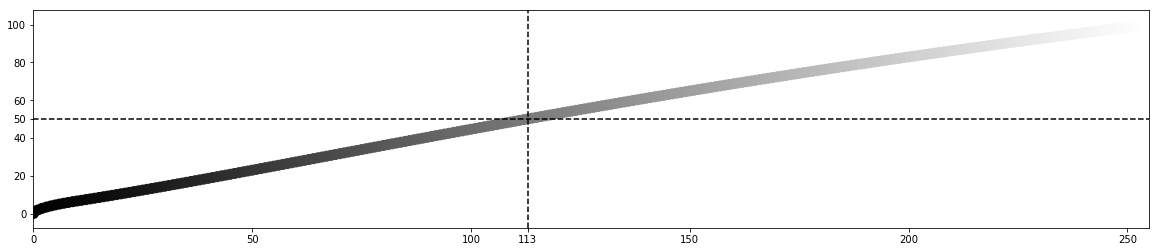

In [22]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks1cs), y_ticks1cs)
plt.xticks(np.array(x_ticks1cs), x_ticks1cs)
plt.scatter(x, l_bwcs, s = 100, c = l_bw, cmap='gray')
plt.xlim(min(x),max(x))
ax.set_yticks([50], minor=True)
ax.axhline(50, linestyle='--', color='k') 
ax.set_xticks([idx1cs], minor=True)
ax.axvline(idx1cs, linestyle='--', color='k');

Interesting!!!

Now the kinck is gone, or at least, there's a short one for very small values of x, but with opposite slope, which is more reasonable. However, now I see a slight upward concavity for x values just above that.

For now I will leave it here, but with note to self to investigate further.

#### Now plot everything toghether to get the figure reproduced

(Sticking to the `skl.rgb2lab` color converison)

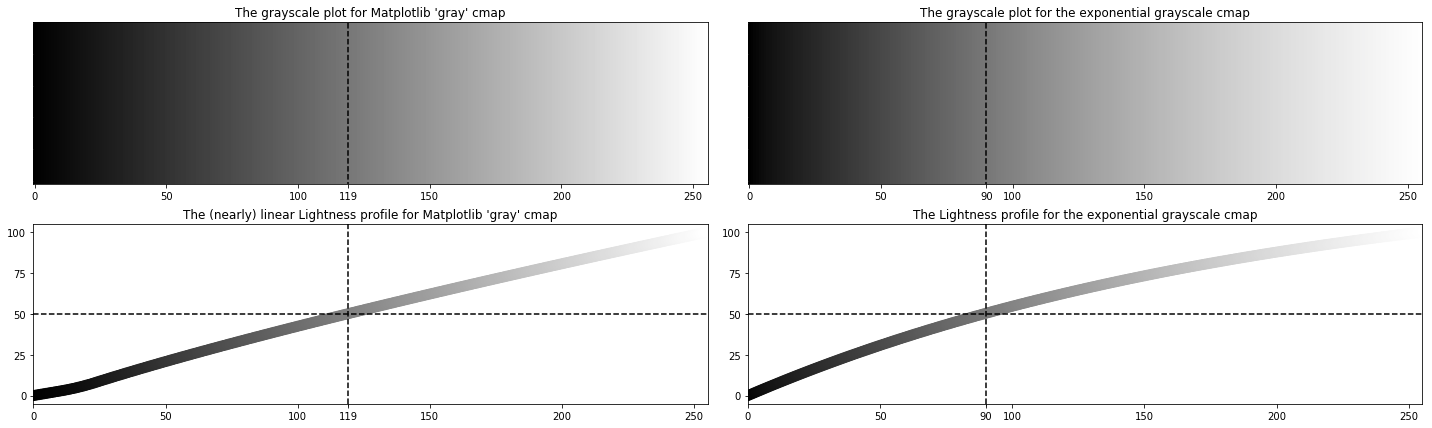

In [23]:
fig = plt.figure(figsize=(20,6))
  
ax0 = plt.subplot2grid((2,2), (1,0))
ax0.set_xlim(min(x),max(x))
ax0.scatter(x,l_bw, s = 100, c = l_bw, cmap='gray')
ax0.set_yticks([50], minor=True)
ax0.set_yticks([0, 25, 50, 75, 100])
ax0.set_yticklabels([0, 25, 50, 75, 100])
ax0.set_xticks([idx1], minor=True)
locx0 = list(ax0.xaxis.get_ticklocs())
locx0.append(idx1)
ax0.set_xticks(locx0)
ax0.set_xlim(min(x),max(x))
ax0.axhline(50, linestyle='--', color='k') 
ax0.axvline(idx1, linestyle='--', color='k')
ax0.set_title('The (nearly) linear Lightness profile for Matplotlib \'gray\' cmap')


ax1 = plt.subplot2grid((2,2), (0,0))
ax1.imshow(rgb_bw, aspect=0.24)
ax1.plot([idx1,idx1], [0,255], '--k')
ax1.set_xticks(x_ticks1);
ax1.tick_params(axis='y', color='w', labelcolor='white')
ax1.set_title('The grayscale plot for Matplotlib \'gray\' cmap')

ax2 = plt.subplot2grid((2,2), (1,1))
ax2.scatter(x,y1, s = 100, c = my_exp_cmap(x))
ax2.set_yticks([50], minor=True)
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.set_yticklabels([0, 25, 50, 75, 100])
ax2.set_xticks([idx], minor=True)
locx = list(ax2.xaxis.get_ticklocs())
locx.append(idx)
ax2.set_xticks(locx)
ax2.set_xlim(min(x),max(x))
ax2.axhline(50, linestyle='--', color='k') 
ax2.axvline(idx, linestyle='--', color='k')
ax2.set_title('The Lightness profile for the exponential grayscale cmap')

ax3 = plt.subplot2grid((2,2), (0,1))
ax3.imshow(rgb_exponential, aspect=0.24)
ax3.plot([idx,idx], [0,255], '--k')
ax3.set_xticks(x_ticks);
ax3.tick_params(axis='y', color='w', labelcolor='white')
ax3.set_title('The grayscale plot for the exponential grayscale cmap')

plt.tight_layout();

#### Compare the two colormaps using a seismic amplitude slice 

The amplitude slice was extracted from the [F3 open 3D survey](https://wiki.seg.org/wiki/Open_data#F3_Netherlands)

In [24]:
data=np.load('F3_dip_steered_med_IL230-43_XL475-675_T1660.npy')

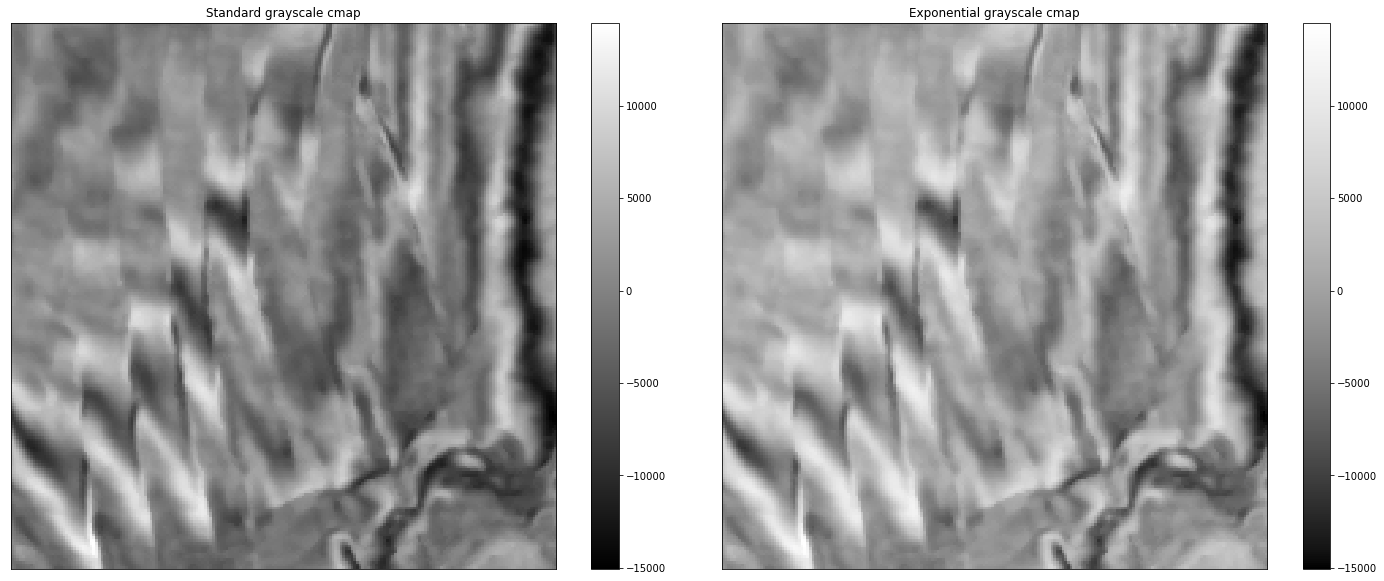

In [25]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1, 2, 1)
plt.imshow(data, cmap = 'gray')
plt.colorbar()
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Standard grayscale cmap')

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(data, cmap = my_exp_cmap)
plt.colorbar()
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Exponential grayscale cmap')

plt.tight_layout();

#### Optional commands to export of exponential grayscale array to a text file

In [26]:
#save_rgb_exponential = np.round(rgb_exponential[0, :, :], decimals=4)

In [27]:
#np.savetxt('rgb_exponential_grays.txt',save_rgb_exponential,delimiter=',', fmt='%1.4f')